https://github.com/techedlaksh/traffic-signs/blob/master/Resizing%20Image.ipynb

https://github.com/neonithinar/GTRSB/blob/main/GTRSB.ipynb

book
https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter08_intro-to-dl-for-computer-vision.ipynb

In [ ]:
### Converting images to tensors

# Known sizes:

# Training set: The mean of width = 50.836207 , height = 50.329193
# Validation set: The mean of width = 50.527037 , height = 50.380346

# Known means and stds
# mean=[0.3418, 0.3126, 0.3224], std=[0.1627, 0.1632, 0.1731]

size_imgs = 100

preprocess_normalize = transforms.Compose([
    transforms.Resize(size_imgs),
    transforms.CenterCrop(size_imgs),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.3418, 0.3126, 0.3224], std=[0.1627, 0.1632, 0.1731])
])

trainset_t = torchvision.datasets.ImageFolder("C:/Users/Francisco Duran/Desktop/upc/project_notebooks/CNN-in-mobile-device/data/raw/TRAIN",transform = preprocess_normalize)
#C:\Users\Francisco Duran\Desktop\upc\project_notebooks


In [9]:
train_dir = "C:/Users/Francisco Duran/Desktop/upc/project_notebooks/CNN-in-mobile-device/data/raw/TRAIN"

In [10]:
pwd

'C:\\Users\\Francisco Duran\\Desktop\\upc\\project_notebooks\\github_project\\DL_notebooks\\notebooks\\keras_tf'

In [19]:
!pip install opencv-python


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

import cv2

In [24]:
train_folder = train_dir

In [26]:
image_paths = [os.listdir(x[0]) for x in os.walk(train_folder)]
image_paths

[['00000',
  '00001',
  '00002',
  '00003',
  '00004',
  '00005',
  '00006',
  '00007',
  '00008',
  '00009',
  '00010',
  '00011',
  '00012',
  '00013',
  '00014',
  '00015',
  '00016',
  '00017',
  '00018',
  '00019',
  '00020',
  '00021',
  '00022',
  '00023',
  '00024',
  '00025',
  '00026',
  '00027',
  '00028',
  '00029',
  '00030',
  '00031',
  '00032',
  '00033',
  '00034',
  '00035',
  '00036',
  '00037',
  '00038',
  '00039',
  '00040',
  '00041',
  '00042'],
 ['00000_00000.ppm',
  '00000_00001.ppm',
  '00000_00002.ppm',
  '00000_00003.ppm',
  '00000_00004.ppm',
  '00000_00005.ppm',
  '00000_00006.ppm',
  '00000_00007.ppm',
  '00000_00008.ppm',
  '00000_00009.ppm',
  '00000_00010.ppm',
  '00000_00011.ppm',
  '00000_00012.ppm',
  '00000_00013.ppm',
  '00000_00014.ppm',
  '00000_00015.ppm',
  '00000_00016.ppm',
  '00000_00017.ppm',
  '00000_00018.ppm',
  '00000_00019.ppm',
  '00000_00020.ppm',
  '00000_00021.ppm',
  '00000_00022.ppm',
  '00000_00023.ppm',
  '00000_00024.ppm',
 

In [27]:
labels = image_paths[0]
labels

['00000',
 '00001',
 '00002',
 '00003',
 '00004',
 '00005',
 '00006',
 '00007',
 '00008',
 '00009',
 '00010',
 '00011',
 '00012',
 '00013',
 '00014',
 '00015',
 '00016',
 '00017',
 '00018',
 '00019',
 '00020',
 '00021',
 '00022',
 '00023',
 '00024',
 '00025',
 '00026',
 '00027',
 '00028',
 '00029',
 '00030',
 '00031',
 '00032',
 '00033',
 '00034',
 '00035',
 '00036',
 '00037',
 '00038',
 '00039',
 '00040',
 '00041',
 '00042']

In [28]:
datax = image_paths[1:]
datax

[['00000_00000.ppm',
  '00000_00001.ppm',
  '00000_00002.ppm',
  '00000_00003.ppm',
  '00000_00004.ppm',
  '00000_00005.ppm',
  '00000_00006.ppm',
  '00000_00007.ppm',
  '00000_00008.ppm',
  '00000_00009.ppm',
  '00000_00010.ppm',
  '00000_00011.ppm',
  '00000_00012.ppm',
  '00000_00013.ppm',
  '00000_00014.ppm',
  '00000_00015.ppm',
  '00000_00016.ppm',
  '00000_00017.ppm',
  '00000_00018.ppm',
  '00000_00019.ppm',
  '00000_00020.ppm',
  '00000_00021.ppm',
  '00000_00022.ppm',
  '00000_00023.ppm',
  '00000_00024.ppm',
  '00000_00025.ppm',
  '00000_00026.ppm',
  '00000_00027.ppm',
  '00000_00028.ppm',
  '00000_00029.ppm',
  '00001_00000.ppm',
  '00001_00001.ppm',
  '00001_00002.ppm',
  '00001_00003.ppm',
  '00001_00004.ppm',
  '00001_00005.ppm',
  '00001_00006.ppm',
  '00001_00007.ppm',
  '00001_00008.ppm',
  '00001_00009.ppm',
  '00001_00010.ppm',
  '00001_00011.ppm',
  '00001_00012.ppm',
  '00001_00013.ppm',
  '00001_00014.ppm',
  '00001_00015.ppm',
  '00001_00016.ppm',
  '00001_0001

In [30]:
resized_folder ="C:/Users/Francisco Duran/Desktop/upc/project_notebooks/github_project/DL_notebooks/resized_train/"


In [33]:
for iy in range(len(labels)): 
    l_image = []
    for ix in range(len(datax[iy])):
        a  = cv2.imread(train_folder+'/'+labels[iy]+'/'+datax[iy][ix],0)
        try:
            resized_a = cv2.resize(a, (32, 32)) 
            l_image.append(resized_a)
        except:
            pass
    np.save(resized_folder + labels[iy], l_image)

KeyboardInterrupt: 

In [34]:
import tensorflow.keras.preprocessing

train_set = tensorflow.keras.preprocessing.image_dataset_from_directory(train_dir, labels='inferred')

Found 39208 files belonging to 43 classes.


In [36]:
train_dir

'C:/Users/Francisco Duran/Desktop/upc/project_notebooks/CNN-in-mobile-device/data/raw/TRAIN'

In [37]:
# create train, test and validation dirs with split folders
os.makedirs('C:/Users/Francisco Duran/Desktop/upc/project_notebooks/CNN-in-mobile-device/data/raw/final')
os.makedirs('C:/Users/Francisco Duran/Desktop/upc/project_notebooks/CNN-in-mobile-device/data/raw/final/train')
os.makedirs('C:/Users/Francisco Duran/Desktop/upc/project_notebooks/CNN-in-mobile-device/data/raw/final/test')
os.makedirs('C:/Users/Francisco Duran/Desktop/upc/project_notebooks/CNN-in-mobile-device/data/raw/final/val')

In [42]:
!pip install split-folders

In [43]:
import splitfolders  # or import split_folders

In [44]:
# split the data in GTRSB/Final_Training/Images into the above folders
output_folder = "C:/Users/Francisco Duran/Desktop/upc/project_notebooks/CNN-in-mobile-device/data/raw/final"
# input folder is data_dir
splitfolders.ratio(train_dir, output= output_folder, seed = 42, ratio=(0.8, 0.1, 0.1))

Copying files: 78416 files [14:10, 92.18 files/s] 


In [45]:

train_dir = os.path.join('C:/Users/Francisco Duran/Desktop/upc/project_notebooks/CNN-in-mobile-device/data/raw/final/train')
test_dir = os.path.join('C:/Users/Francisco Duran/Desktop/upc/project_notebooks/CNN-in-mobile-device/data/raw/final/test')
val_dir = os.path.join('C:/Users/Francisco Duran/Desktop/upc/project_notebooks/CNN-in-mobile-device/data/raw/final/val')



In [46]:

img_width = 48
img_height = 48

batch_size = 32

In [49]:
!pip install keras

In [52]:
import keras 
train_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=42, 
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 31339 files belonging to 43 classes.


In [53]:
val_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  seed=42, 
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3920 files belonging to 43 classes.


In [54]:
test_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=42, 
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3949 files belonging to 43 classes.


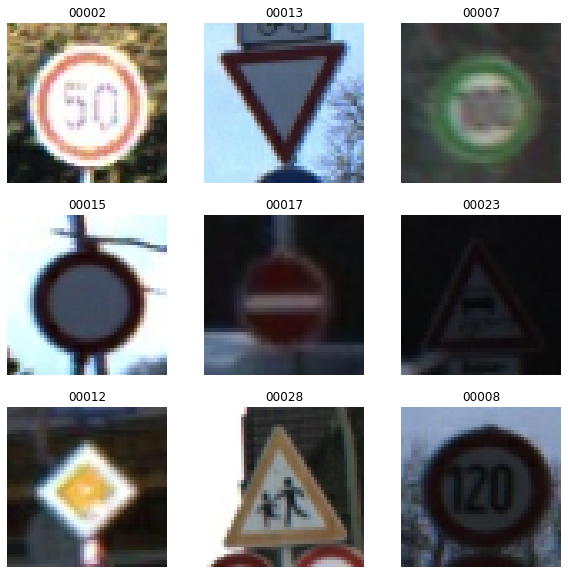

In [55]:
train_class_names = train_ds.class_names
plt.figure(figsize= (10, 10))
for images, label in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_class_names[label[i]])
    plt.axis("off")


In [56]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [57]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [58]:


for data_batch, labels_batch in train_ds:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break



data batch shape: (32, 48, 48, 3)
labels batch shape: (32,)


In [59]:


from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(48, 48, 3))
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(43, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)



ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_4/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_4/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,256], [3,3,256,256].

In [67]:
img_height
batch_size

32

In [65]:

model = keras.models.Sequential([
                                 keras.layers.experimental.preprocessing.Rescaling(1./255, 
                                                                                   input_shape=(img_height, img_width, 3)), 
                                 keras.layers.Conv2D(32, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(32, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)),
                                 keras.layers.BatchNormalization(),  
                                 keras.layers.Dropout(0.2), 

                                 keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(64, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)), 
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),

                                 keras.layers.Conv2D(128, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(128, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)), 
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.2),

                                 keras.layers.Flatten(), 
                                 keras.layers.Dense(128, activation= 'relu'), 
                                 keras.layers.Dropout(0.5), 
                                 keras.layers.Dense(86, activation= 'relu'), 
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.5), 
                                 keras.layers.Dense(43, activation = 'softmax')
])

#early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
#model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [68]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [70]:
history = model.fit(train_ds, validation_data = val_ds,callbacks= [early_stopping_cb], epochs = 10)

Epoch 1/10
980/980 [==============================] - 519s 529ms/step - loss: 1.3749 - accuracy: 0.6074 - val_loss: 0.2169 - val_accuracy: 0.9464
Epoch 2/10
980/980 [==============================] - 252s 258ms/step - loss: 0.3434 - accuracy: 0.9069 - val_loss: 0.0601 - val_accuracy: 0.9867
Epoch 3/10
980/980 [==============================] - 263s 268ms/step - loss: 0.1827 - accuracy: 0.9509 - val_loss: 0.0717 - val_accuracy: 0.9814
Epoch 4/10
980/980 [==============================] - 284s 290ms/step - loss: 0.1331 - accuracy: 0.9633 - val_loss: 0.0164 - val_accuracy: 0.9957
Epoch 5/10
980/980 [==============================] - 294s 300ms/step - loss: 0.1118 - accuracy: 0.9685 - val_loss: 0.0110 - val_accuracy: 0.9959
Epoch 6/10
980/980 [==============================] - 303s 309ms/step - loss: 0.0879 - accuracy: 0.9742 - val_loss: 0.0138 - val_accuracy: 0.9967
Epoch 7/10
980/980 [==============================] - 291s 297ms/step - loss: 0.0794 - accuracy: 0.9779 - val_loss: 0.0052 -

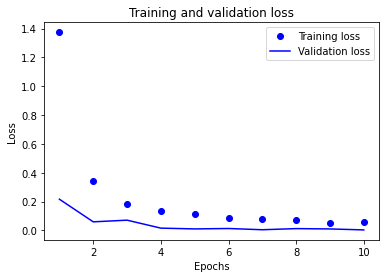

In [71]:
# plotting training and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

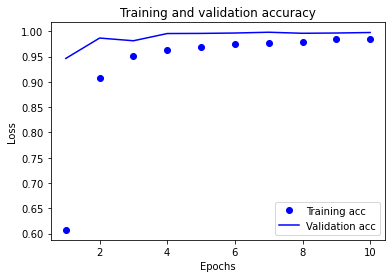

In [75]:
# Plotting training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)       

In [77]:
model.save("C:/Users/Francisco Duran/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/tf_model01_99")


INFO:tensorflow:Assets written to: C:/Users/Francisco Duran/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/tf_model01_99\assets


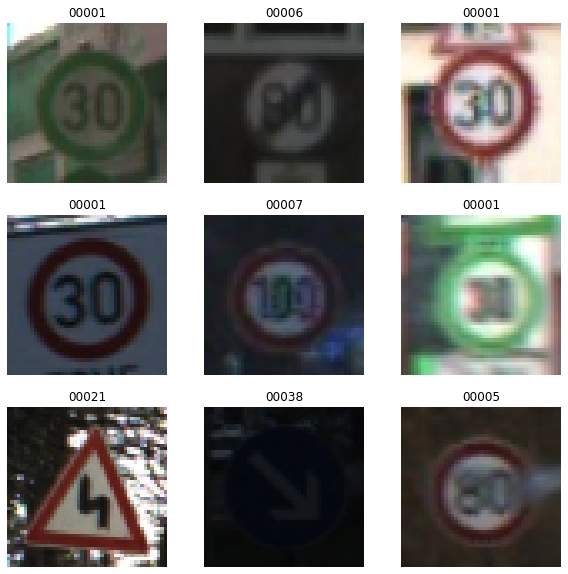

In [78]:
test_class_names = test_ds.class_names
plt.figure(figsize= (10, 10))
for images, label in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(test_class_names[label[i]])
    plt.axis("off")

In [79]:
test_dir

'C:/Users/Francisco Duran/Desktop/upc/project_notebooks/CNN-in-mobile-device/data/raw/final/test'

In [91]:
test_image_path = os.path.join(test_dir+'/00001/prefix_00001_00008.jpg')
test_handwritten = os.path.join("C:/Users/Francisco Duran/Desktop/upc/project_notebooks/handwritten_30_signal.jpg")

In [83]:


def preproces_and_predict_image(image_path, class_names = train_class_names):
  test_image = keras.preprocessing.image.load_img(image_path, target_size = (img_height, img_width))
  image_array = keras.preprocessing.image.img_to_array(test_image)
  img_batch = tf.expand_dims(image_array, axis=0)
  predictions_list = model.predict(img_batch)
  prediction = class_names[np.argmax(predictions_list)]
  print(prediction)
  plt.imshow(test_image)
  plt.title(prediction)
  plt.axis("off")
  plt.show()

  return predictions_list



00001


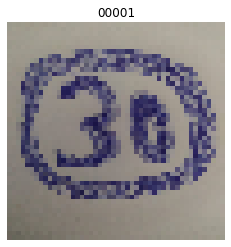

00001


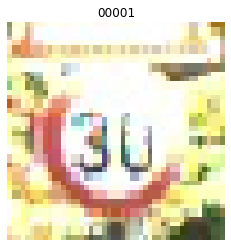

In [92]:
predictions = preproces_and_predict_image(test_handwritten)
predictions = preproces_and_predict_image(test_image_path)

00001


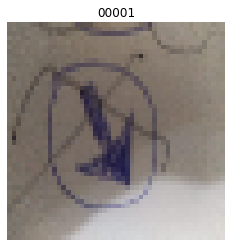

00018


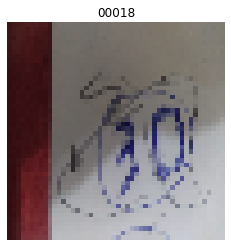

00018


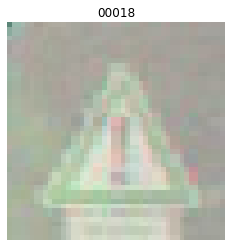

In [95]:
test1 = os.path.join("C:/Users/Francisco Duran/Desktop/upc/project_notebooks/hand_.jpg")
test2 = os.path.join("C:/Users/Francisco Duran/Desktop/upc/project_notebooks/hand_2.jpg")
test3 = os.path.join(test_dir+'/00018/prefix_00002_00004.jpg')


predictions = preproces_and_predict_image(test1)
predictions = preproces_and_predict_image(test2)
predictions = preproces_and_predict_image(test3)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [63]:
history = model.fit(train_ds, validation_data = val_ds,callbacks= [early_stopping_cb], epochs = 10)

NameError: name 'early_stopping_cb' is not defined

In [64]:
history = model.fit(train_ds,
epochs=20,
batch_size=512,
validation_data=val_ds)

Epoch 1/20


ValueError: in user code:

    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 train_step
        loss = self.compiled_loss(
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\Francisco Duran\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 43) are incompatible
